In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Specify the path to your .tsv file
tsv_file_path = '/content/drive/MyDrive/camera_datset_00.tsv'

# Read the .tsv file into a DataFrame, skipping problematic lines
df = pd.read_csv(tsv_file_path, delimiter='\t', on_bad_lines='skip')


#Dataset Loaded

In [ ]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,N,Y,Five Stars,ok,2015-08-31
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,N,Y,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,N,Y,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,N,Y,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,N,Y,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800840,US,51967237,R2II0GWVA7GL4J,B00000DM93,532198566,Minolta Vectis 300 Beam APS Camera,Camera,5,24,25,N,N,"Compact, easy to use, and great pictures!",I bought this camera to take on my trip to Eur...,1999-06-06
1800841,US,51306730,R2YZH4LW7AANH4,B00000DM93,532198566,Minolta Vectis 300 Beam APS Camera,Camera,5,3,17,N,N,timur,hello menya zavut Timurlan. ya ce iz krgzist...,1999-05-28
1800842,US,52267609,R1FRU9LWC7IBDQ,B00000DM93,532198566,Minolta Vectis 300 Beam APS Camera,Camera,5,2,5,N,N,"a very small, but very good camera !!",I've token about 1000 picture's with this came...,1999-05-02
1800843,US,52859048,RYBK7XWLUMO67,B00000DM96,411935344,Olympus Stylus Zoom 115 QD DLX Date 35mm Camera,Camera,5,43,46,N,N,Exceptional Cameras,My wife and I began using the stylus series ye...,1998-12-18


In [ ]:
df['marketplace'].nunique()

1

In [ ]:
df['product_title'].nunique()

154809

In [ ]:
# Check if a product ID exists in the DataFrame
product_id = 'B07MK775TT'
exists = product_id in df['product_id'].values

if exists:
    print(f"The product ID {product_id} exists in the DataFrame.")
else:
    print(f"The product ID {product_id} does not exist in the DataFrame.")


The product ID B07MK775TT does not exist in the DataFrame.


#Data Cleaning

In [ ]:
df.isnull().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      18
review_body          92
review_date           9
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [ ]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [ ]:
df['product_id'].nunique()

168635

In [ ]:
df['product_category'].nunique()

1

In [ ]:
df['review_body'].nunique()

1695891

In [ ]:
df['review_id'].nunique()

1800726

In [ ]:
df['product_parent'].nunique()

153423

In [ ]:
product_count_per_parent = df.groupby('product_parent')['product_id'].nunique().reset_index()
product_count_per_parent.columns = ['parent_product_id', 'num_products']
product_count_per_parent_sorted = product_count_per_parent.sort_values(by='num_products', ascending=False)

In [ ]:
product_count_per_parent_sorted

,parent_product_id,num_products
77131,500826834,109
16695,107741735,62
21483,138905340,60
41156,267821558,56
97675,636637627,54
...,...,...
52394,340522344,1
52395,340532576,1
52396,340532619,1
52398,340555191,1


#Filter data on review count

In [ ]:
product_occurrence = df['product_id'].value_counts().reset_index()
product_occurrence.columns = ['product_id', 'review_count']
df = pd.merge(df, product_occurrence, on='product_id', how='left')

In [ ]:
filtered_df = df[df['review_count'] >= 2000]

In [ ]:
filtered_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_count
55,US,16186864,R2JF6AADBJXWPS,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,5,0,0,N,Y,Great Case!,This case was a nice upgrade from my old bag. ...,2015-08-31,3562
128,US,42542762,R16ORPTXEOW6IB,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,5,0,0,N,Y,"small, not a lot space but...",Much smaller than its seems but I'm a short gi...,2015-08-31,3562
291,US,11736306,R1MIRDB9OBMM3I,B00007EDZG,479032842,Nikon ML-L3 Wireless Remote Control,Camera,5,0,0,N,Y,Five Stars,works well,2015-08-31,2269
356,US,2975964,R2ELHUTVHT4ROR,B0039BPG1A,716602542,Case Logic DCB-304 Compact System/Hybrid Camer...,Camera,5,0,1,N,Y,Five Stars,ok,2015-08-31,3618
406,US,14893783,R1DKDZVZUPGSDH,B002ZIMEMW,908776825,Neewer 110CM 43-Inch 5-in-1 Collapsible Multi-...,Camera,5,0,0,N,Y,Five Stars,"Excellent, Love it",2015-08-31,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771806,US,52675098,R1L1KLR3D0N83W,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,5,9,9,N,Y,worth repeating: best lens for the money!,"this is an awesome lens! produces sharp, clea...",2004-10-17,4399
1772105,US,51025556,R3F0SYTS13GYU2,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,5,9,10,N,N,Best lens for the money,This lens is very good and a great value at tw...,2004-09-27,4399
1772164,US,31104999,R1YNKZQ8AFWP7K,B00009R6TA,512300371,Canon Deluxe Backpack -water resistant back pa...,Camera,5,94,118,N,N,Great Bag! Great Price!,This bag is big enough to fit an SLR and pract...,2004-09-23,2314
1773002,US,50908294,R32CU49M5QMOGW,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,5,205,242,N,N,"Best lens for the money, every EOS owner shoul...",5 star for value and picture quality. <br /> <...,2004-07-30,4399


#Drop useless columns

In [ ]:
filtered_df = filtered_df.drop(['marketplace', 'star_rating','helpful_votes','total_votes','vine','verified_purchase','review_date'], axis=1)


In [ ]:
filtered_df

,customer_id,review_id,product_id,product_parent,product_title,product_category,review_headline,review_body,review_count
55,16186864,R2JF6AADBJXWPS,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,Great Case!,This case was a nice upgrade from my old bag. ...,3562
128,42542762,R16ORPTXEOW6IB,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,"small, not a lot space but...",Much smaller than its seems but I'm a short gi...,3562
291,11736306,R1MIRDB9OBMM3I,B00007EDZG,479032842,Nikon ML-L3 Wireless Remote Control,Camera,Five Stars,works well,2269
356,2975964,R2ELHUTVHT4ROR,B0039BPG1A,716602542,Case Logic DCB-304 Compact System/Hybrid Camer...,Camera,Five Stars,ok,3618
406,14893783,R1DKDZVZUPGSDH,B002ZIMEMW,908776825,Neewer 110CM 43-Inch 5-in-1 Collapsible Multi-...,Camera,Five Stars,"Excellent, Love it",2024
...,...,...,...,...,...,...,...,...,...
1771806,52675098,R1L1KLR3D0N83W,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,worth repeating: best lens for the money!,"this is an awesome lens! produces sharp, clea...",4399
1772105,51025556,R3F0SYTS13GYU2,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,Best lens for the money,This lens is very good and a great value at tw...,4399
1772164,31104999,R1YNKZQ8AFWP7K,B00009R6TA,512300371,Canon Deluxe Backpack -water resistant back pa...,Camera,Great Bag! Great Price!,This bag is big enough to fit an SLR and pract...,2314
1773002,50908294,R32CU49M5QMOGW,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,"Best lens for the money, every EOS owner shoul...",5 star for value and picture quality. <br /> <...,4399


#Filtering on the basis of word count

In [ ]:
def count_words(text):
    words = text.split()  # Split the text into words
    return len(words)  # Return the number of words

# Apply the word count function to 'ReviewText' column and create a new column 'WordCount'
filtered_df['WordCount'] = filtered_df['review_body'].apply(count_words)

# Filter out reviews with less than 10 words
filtered_df1 = filtered_df[filtered_df['WordCount'] >= 50]

In [ ]:
filtered_df1

,customer_id,review_id,product_id,product_parent,product_title,product_category,review_headline,review_body,review_count,WordCount
1196,20947453,R2TETEVMTM2K0H,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,... not the biggest bag ever which can be both...,This bag is not the biggest bag ever which can...,3562,87
1342,22882044,R1TVSEN5OSP0HO,B00F9FCW7K,656927179,Dropcam Pro Wi-Fi Wireless Video Monitoring Se...,Camera,The drop cams I purchased were directly from N...,The drop cams I purchased were directly from N...,2240,127
1372,12004964,RF9JFFNC1TFZ6,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,I had been looking a little for case for my ...,I had been looking a little for case for my n...,3562,110
1652,161069,R1BNMYJGY4FS80,B00009R6TA,512300371,Canon Deluxe Backpack -water resistant back pa...,Camera,Great buy,Pretty good buy. I just wish it was a little b...,2314,72
1701,14137844,R303DZSD2MNJZT,B0080JH3YE,172123122,Cleaning Kit,Camera,Excellent product.,This is a wonderful product and essential if y...,2089,76
...,...,...,...,...,...,...,...,...,...,...
1770735,44553013,RN35YCNXMUMMZ,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,"Great value, poor build quality.",People have complained about the build quality...,4399,84
1771806,52675098,R1L1KLR3D0N83W,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,worth repeating: best lens for the money!,"this is an awesome lens! produces sharp, clea...",4399,66
1772105,51025556,R3F0SYTS13GYU2,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,Best lens for the money,This lens is very good and a great value at tw...,4399,88
1773002,50908294,R32CU49M5QMOGW,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,"Best lens for the money, every EOS owner shoul...",5 star for value and picture quality. <br /> <...,4399,92


#Now we have 14 unique product

In [ ]:
filtered_df1['product_title'].nunique()

14

#Cleaning review

In [ ]:
import nltk
from nltk import pos_tag, word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter,defaultdict
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
opinion_words = set(opinion_lexicon.words())
from nltk.sentiment.util import mark_negation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string

# Preprocess text
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    try:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        processed_text = ' '.join(tokens)

        return processed_text
    except AttributeError:
        return ""

In [ ]:
filtered_df1['clean_text'] = filtered_df1['review_body'].apply(preprocess_text)

<ipython-input-27-c88a56c12bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['clean_text'] = filtered_df1['review_body'].apply(preprocess_text)


In [ ]:
filtered_df1['clean_text']

1196       bag biggest bag ever good bad little smaller a...
1342       drop cam purchased directly nest advice anyone...
1372       looking little case new camera nikon d5300 acc...
1652       pretty good buy wish little bit stylish backpa...
1701       wonderful product essential expensive camera b...
                                 ...                        
1770735    people complained build quality indeed subpar ...
1771806    awesome lens produce sharp clear photo every t...
1772105    lens good great value twice price never make p...
1773002    5 star value picture quality br br money 14 ve...
1782610    optically cant really much better f18 strong c...
Name: clean_text, Length: 15081, dtype: object

In [ ]:
def count_words(text):
    words = text.split()  # Split the text into words
    return len(words)  # Return the number of words

# Apply the word count function to 'ReviewText' column and create a new column 'WordCount'
filtered_df1['WordCount_ofCleanText'] = filtered_df1['clean_text'].apply(count_words)


<ipython-input-29-c4d73fbfd1f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['WordCount_ofCleanText'] = filtered_df1['clean_text'].apply(count_words)


#Extracting Bigrams

In [ ]:
def extract_bigram_features(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)

    # Get a set of opinion (sentiment) words from NLTK's opinion lexicon
    opinion_words = set(opinion_lexicon.words())

    # Initialize list to store extracted bigram features
    bi_grams = []

    # Define part-of-speech patterns for bigram extraction
    AN_pattern = [('JJ', 'NN'), ('JJ', 'NNS')]  # Adjective-Noun pattern
    NN_pattern = [('NN', 'NN'), ('NNS', 'NN')]  # Noun-Noun pattern

    # Process each sentence in the text
    for sentence in sentences:
        # Tokenize words and get part-of-speech tags
        tokens = word_tokenize(sentence.lower())
        pos_tags = nltk.pos_tag(tokens)

        # Extract bigrams based on part-of-speech patterns
        for i in range(len(pos_tags) - 1):
            current_tag = pos_tags[i][1]
            next_tag = pos_tags[i+1][1]

            # Check for Adjective-Noun pattern and filter out opinion words
            if (current_tag, next_tag) in AN_pattern and pos_tags[i][0] not in opinion_words:
                bi_grams.append((pos_tags[i][0], pos_tags[i+1][0]))

            # Check for Noun-Noun pattern
            if (current_tag, next_tag) in NN_pattern:
                bi_grams.append((pos_tags[i][0], pos_tags[i+1][0]))

    return bi_grams

In [ ]:
filtered_df1['result_bigram_text']= filtered_df1['review_body'].apply(extract_bigram_features)

<ipython-input-31-989d4fc796f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['result_bigram_text']= filtered_df1['review_body'].apply(extract_bigram_features)


In [ ]:
filtered_df1['result_bigram_text']

1196                                            [(do, move)]
1342       [(drop, cams), (cams, i), (customer, service),...
1372       [(new, camera), (nikon, d5300), (first, dslr),...
1652       [(little, bit), (zippered, part), (extra, mate...
1701       [(astronomy, binoculars), (dust, etc), (everyt...
                                 ...                        
1770735    [(build, quality), (tiny, bit), (focusing, mec...
1771806                   [(extra, couple), (lenses, canon)]
1772105                  [(canon, slrs), (75-300mm, lenses)]
1773002    [(picture, quality), (<, br), (half, stop), (f...
1782610    [(color, rendition), (several, months), (defau...
Name: result_bigram_text, Length: 15081, dtype: object

In [ ]:
pip install torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 4.3 MB/s eta 0:00:00
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

#Validated Noun

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import opinion_lexicon
from collections import Counter, defaultdict

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('opinion_lexicon')

# Load opinion words
opinion_words = set(opinion_lexicon.words())

def extract_validated_noun_features(text):
    # Initialize counters
    noun_occurrences = Counter()
    valid_nouns = Counter()

    if not isinstance(text, str):
        return valid_nouns  # Return empty Counter if not a string

    sentences = sent_tokenize(text)
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged_tokens = pos_tag(tokens)

        # Check for presence of sentiment words in the sentence
        sentiment_present = any(word.lower() in opinion_words for word, tag in tagged_tokens if tag.startswith('JJ'))

        # Count nouns and track valid nouns based on sentiment presence
        for word, tag in tagged_tokens:
            if tag.startswith('NN'):  # Noun tags
                noun_occurrences[word] += 1
                if sentiment_present:
                    valid_nouns[word] += 1

    # Calculate final list of nouns that meet the frequency threshold
    final_nouns = {noun for noun, count in valid_nouns.items() if count / noun_occurrences[noun] >= 0.3}
    return final_nouns


# Apply the function to each review in the DataFrame
filtered_df1['validated_nouns'] = filtered_df1['clean_text'].apply(extract_validated_noun_features)
print(filtered_df1['validated_nouns'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


1196       {look, section, pocket, velcro, dont, price, n...
1342       {incompetent, research, minute, customer, drop...
1372       {item, accessory, nikon, tablet, wallet, feel,...
1652       {bit, oh, comfy, pain, job, equipment, materia...
1701       {product, strain, lens, dust, everything, came...
                                 ...                        
1770735    {use, bit, oh, mine, wish, quality, thing, bri...
1771806    {fork, faster, doubt, stop, get, lens, photo, ...
1772105    {shot, appreciate, canon, month, f18, print, v...
1773002    {solution, plastic, yeah, lens, buck, portrait...
1782610    {shot, box, cheap, piece, lens, market, f14, b...
Name: validated_nouns, Length: 15081, dtype: object


<ipython-input-35-d57419fa5195>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['validated_nouns'] = filtered_df1['clean_text'].apply(extract_validated_noun_features)


In [ ]:
filtered_df1['validated_nouns'].iloc[1196]

{'account',
 'alarm',
 'br',
 'capture',
 'competitor',
 'default',
 'didnt',
 'end',
 'feature',
 'finebr',
 'firmwaresoftware',
 'hardware',
 'http',
 'image',
 'ir',
 'issue',
 'job',
 'login',
 'love',
 'minute',
 'mode',
 'motion',
 'nasbr',
 'pantilt',
 'price',
 'rating',
 'security',
 'shouldnt',
 'software',
 'start',
 'stuff',
 'timebr',
 'unit',
 'use',
 'way',
 'work',
 'year'}

In [ ]:
filtered_df1['clean_text'].iloc[1196]

'hardware stuff relatively generic firmwaresoftware provided foscam decent great get good rating end better competitor pricebr br love pantilt feature ir mode work well nightbr wireless seems work finebr br hooked qnap na unit work well way set use built software capture image email motion alarm also record minute alarm go local nasbr br minus start software decent great security issue remote login default account fixed still think dont http login mode least didnt long timebr br price shouldnt pay 5060 even 2 year ago bought job'

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

#Feature Sentiment

In [ ]:
def load_negation_words(file_path):
    with open(file_path, 'r') as file:
        negation_words = {line.strip().lower() for line in file if line.strip()}
    return negation_words

# Load negation words from the specified file
negation_words = load_negation_words('/content/drive/MyDrive/negative-words.txt')

def extract_features_and_sentiments(text, negation_words):
    sentences = sent_tokenize(text)
    feature_sentiments = defaultdict(list)
    opinion_patterns = defaultdict(int)

    for sentence in sentences:
        tokens = word_tokenize(sentence.lower())
        tagged_tokens = pos_tag(tokens)
        features = [word for word, tag in tagged_tokens if tag.startswith('NN')]  # Example feature extraction

        for feature in features:
            distances = {}
            for i, (word, tag) in enumerate(tagged_tokens):
                if word in opinion_words:
                    feature_index = tokens.index(feature)
                    distances[word] = abs(i - feature_index)

            if distances:
                closest_word = min(distances, key=distances.get)
                closest_index = tokens.index(closest_word)
                pattern = tuple(tag for _, tag in tagged_tokens[max(0, closest_index-4):min(len(tokens), closest_index+5)])
                opinion_patterns[pattern] += 1
                feature_sentiments[feature].append((closest_word, closest_index, pattern))

    final_sentiments = {}
    for feature, sentiments in feature_sentiments.items():
        valid_sentiments = []
        for word, index, pattern in sentiments:
            if opinion_patterns[pattern] >= 2:
                # Ensure the range for negation check is within the bounds of the tokens list
                start_index = max(0, index-4)
                end_index = min(len(tokens), index+1)
                negation_present = any(tokens[i] in negation_words for i in range(start_index, end_index))
                sentiment = 'negative' if negation_present else 'positive'
                valid_sentiments.append(sentiment)

        if valid_sentiments:
            sentiment_counts = Counter(valid_sentiments)
            final_sentiments[feature] = max(sentiment_counts, key=sentiment_counts.get)
        else:
            final_sentiments[feature] = 'neutral'

    return final_sentiments

# Apply the sentiment analysis function to each review
filtered_df1['sentiment_analysis'] = filtered_df1['clean_text'].apply(lambda x: extract_features_and_sentiments(x, negation_words))

<ipython-input-41-74d99ce257d4>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['sentiment_analysis'] = filtered_df1['clean_text'].apply(lambda x: extract_features_and_sentiments(x, negation_words))


In [ ]:
filtered_df1['sentiment_analysis']

1196       {'bag': 'negative', 'nicer': 'neutral', 'secti...
1342       {'drop': 'negative', 'cam': 'negative', 'advic...
1372       {'case': 'positive', 'camera': 'positive', 'ni...
1652       {'bit': 'positive', 'backpack': 'positive', 'o...
1701       {'product': 'positive', 'camera': 'negative', ...
                                 ...                        
1770735    {'people': 'negative', 'quality': 'negative', ...
1771806    {'lens': 'positive', 'photo': 'neutral', 'time...
1772105    {'value': 'positive', 'price': 'positive', 'pr...
1773002    {'star': 'negative', 'value': 'negative', 'pic...
1782610    {'f18': 'positive', 'contrast': 'neutral', 'co...
Name: sentiment_analysis, Length: 15081, dtype: object

In [ ]:
def calculate_scores_per_product(df_group):
    feature_scores_per_product = []

    total_reviews = len(df_group)  # Total number of reviews in the group

    feature_counts = {}

    for _, row in df_group.iterrows():
        feature_sentiments = row['sentiment_analysis']
        if not isinstance(feature_sentiments, dict):
            continue  # Skip this row if the feature_sentiments is not a dictionary

        for feature, sentiment in feature_sentiments.items():
            if sentiment not in ['positive', 'negative', 'neutral']:
                continue  # Skip if the sentiment is not one of the expected values

            if feature not in feature_counts:
                feature_counts[feature] = {'positive': 0, 'negative': 0, 'neutral': 0, 'reviews': 0}
            feature_counts[feature]['reviews'] += 1  # Increment count of reviews mentioning the feature
            feature_counts[feature][sentiment] += 1

    # Calculate Sent(Fi, P) and Pop(Fi, P) for the current product
    for feature, counts in feature_counts.items():
        pos = counts['positive']
        neg = counts['negative']
        neut = counts['neutral']
        reviews_with_feature = counts['reviews']

        if reviews_with_feature / total_reviews >= 0.1:  # Feature mentioned in more than 10% of reviews
            sent_score = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
            pop_score = reviews_with_feature / total_reviews
            feature_scores_per_product.append([feature, sent_score, pop_score])

    return feature_scores_per_product

# Grouping data based on unique 'asin' values
grouped_data = filtered_df1.groupby('product_id')

# Iterate over each group and apply the function
for idx, (asin, group) in enumerate(grouped_data, 1):
    print(f"Product {idx} feature scores for Product_Id {asin}:")
    product_feature_scores = calculate_scores_per_product(group)
    print(product_feature_scores)


Product 1 feature scores for Product_Id B00007E7JU:
[['lens', 0.45191256830601095, 0.8515588645881805], ['im', 0.325, 0.11167985109353187], ['photo', 0.4380733944954128, 0.20288506281991625], ['way', 0.17488789237668162, 0.1037691949744067], ['picture', 0.37212643678160917, 0.32387156817124246], ['time', 0.11691022964509394, 0.22289436947417404], ['quality', 0.1799163179916318, 0.33364355514192645], ['canon', 0.37209302325581395, 0.3001395998138669], ['work', 0.569811320754717, 0.12331316891577478], ['review', 0.2125748502994012, 0.1554211261051652], ['use', 0.2685589519650655, 0.21312238250349], ['zoom', 0.30124223602484473, 0.1498371335504886], ['focus', -0.1332116788321168, 0.2550023266635644], ['bokeh', 0.375, 0.11167985109353187], ['dont', -0.04643962848297214, 0.15030246626337831], ['light', 0.2670157068062827, 0.17775709632387157], ['shot', 0.4116331096196868, 0.2080037226617031], ['year', 0.17768595041322313, 0.11261051651931131], ['money', 0.375, 0.1563517915309446], ['camera'

In [ ]:
product_feature_scores

[['cam', 0.24375, 0.13400335008375208],
 ['customer', 0.08974358974358974, 0.1306532663316583],
 ['service', -0.06493506493506493, 0.25795644891122277],
 ['minute', 0.19879518072289157, 0.1390284757118928],
 ['day', 0.10457516339869281, 0.2562814070351759],
 ['camera', 0.35706084959816303, 0.7294807370184254],
 ['time', -0.06701030927835051, 0.3249581239530988],
 ['support', 0.391304347826087, 0.1541038525963149],
 ['system', 0.3046875, 0.10720268006700168],
 ['dont', 0.044444444444444446, 0.1507537688442211],
 ['security', 0.26570048309178745, 0.17336683417085427],
 ['company', 0.18461538461538463, 0.10887772194304858],
 ['dropcam', 0.2727272727272727, 0.41457286432160806],
 ['year', 0.043010752688172046, 0.15577889447236182],
 ['app', 0.3055555555555556, 0.1507537688442211],
 ['motion', 0.07514450867052024, 0.14489112227805695],
 ['feature', 0.3640552995391705, 0.18174204355108878],
 ['home', 0.24503311258278146, 0.2529313232830821],
 ['week', 0.31451612903225806, 0.10385259631490787

In [ ]:
filtered_df1

,customer_id,review_id,product_id,product_parent,product_title,product_category,review_headline,review_body,review_count,WordCount,clean_text,WordCount_ofCleanText,result_bigram_text,validated_nouns,sentiment_analysis
1196,20947453,R2TETEVMTM2K0H,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,... not the biggest bag ever which can be both...,This bag is not the biggest bag ever which can...,3562,87,bag biggest bag ever good bad little smaller a...,43,"[(do, move)]","{look, section, pocket, velcro, dont, price, n...","{'bag': 'negative', 'nicer': 'neutral', 'secti..."
1342,22882044,R1TVSEN5OSP0HO,B00F9FCW7K,656927179,Dropcam Pro Wi-Fi Wireless Video Monitoring Se...,Camera,The drop cams I purchased were directly from N...,The drop cams I purchased were directly from N...,2240,127,drop cam purchased directly nest advice anyone...,73,"[(drop, cams), (cams, i), (customer, service),...","{incompetent, research, minute, customer, drop...","{'drop': 'negative', 'cam': 'negative', 'advic..."
1372,12004964,RF9JFFNC1TFZ6,B002VPE1WK,839407277,AmazonBasics Backpack for SLR/DSLR Cameras and...,Camera,I had been looking a little for case for my ...,I had been looking a little for case for my n...,3562,110,looking little case new camera nikon d5300 acc...,51,"[(new, camera), (nikon, d5300), (first, dslr),...","{item, accessory, nikon, tablet, wallet, feel,...","{'case': 'positive', 'camera': 'positive', 'ni..."
1652,161069,R1BNMYJGY4FS80,B00009R6TA,512300371,Canon Deluxe Backpack -water resistant back pa...,Camera,Great buy,Pretty good buy. I just wish it was a little b...,2314,72,pretty good buy wish little bit stylish backpa...,36,"[(little, bit), (zippered, part), (extra, mate...","{bit, oh, comfy, pain, job, equipment, materia...","{'bit': 'positive', 'backpack': 'positive', 'o..."
1701,14137844,R303DZSD2MNJZT,B0080JH3YE,172123122,Cleaning Kit,Camera,Excellent product.,This is a wonderful product and essential if y...,2089,76,wonderful product essential expensive camera b...,39,"[(astronomy, binoculars), (dust, etc), (everyt...","{product, strain, lens, dust, everything, came...","{'product': 'positive', 'camera': 'negative', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770735,44553013,RN35YCNXMUMMZ,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,"Great value, poor build quality.",People have complained about the build quality...,4399,84,people complained build quality indeed subpar ...,44,"[(build, quality), (tiny, bit), (focusing, mec...","{use, bit, oh, mine, wish, quality, thing, bri...","{'people': 'negative', 'quality': 'negative', ..."
1771806,52675098,R1L1KLR3D0N83W,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,worth repeating: best lens for the money!,"this is an awesome lens! produces sharp, clea...",4399,66,awesome lens produce sharp clear photo every t...,37,"[(extra, couple), (lenses, canon)]","{fork, faster, doubt, stop, get, lens, photo, ...","{'lens': 'positive', 'photo': 'neutral', 'time..."
1772105,51025556,R3F0SYTS13GYU2,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,Best lens for the money,This lens is very good and a great value at tw...,4399,88,lens good great value twice price never make p...,44,"[(canon, slrs), (75-300mm, lenses)]","{shot, appreciate, canon, month, f18, print, v...","{'value': 'positive', 'price': 'positive', 'pr..."
1773002,50908294,R32CU49M5QMOGW,B00007E7JU,477610584,Canon EF 50mm f/1.8 II Camera Lens,Camera,"Best lens for the money, every EOS owner shoul...",5 star for value and picture quality. <br /> <...,4399,92,5 star value picture quality br br money 14 ve...,54,"[(picture, quality), (<, br), (half, stop), (f...","{solution, plastic, yeah, lens, buck, portrait...","{'star': 'negative', 'value': 'negative', 'pic..."


In [125]:
filtered_df1['product_title'].nunique()

14

In [ ]:
import pandas as pd

def calculate_scores_per_product(df_group):
    feature_scores_per_product = []

    total_reviews = len(df_group)  # Total number of reviews in the group

    feature_counts = {}

    for _, row in df_group.iterrows():
        feature_sentiments = row['sentiment_analysis']
        if not isinstance(feature_sentiments, dict):
            continue  # Skip this row if the feature_sentiments is not a dictionary

        for feature, sentiment in feature_sentiments.items():
            if sentiment not in ['positive', 'negative', 'neutral']:
                continue  # Skip if the sentiment is not one of the expected values

            if feature not in feature_counts:
                feature_counts[feature] = {'positive': 0, 'negative': 0, 'neutral': 0, 'reviews': 0}
            feature_counts[feature]['reviews'] += 1  # Increment count of reviews mentioning the feature
            feature_counts[feature][sentiment] += 1

    # Calculate Sent(Fi, P) and Pop(Fi, P) for the current product
    for feature, counts in feature_counts.items():
        pos = counts['positive']
        neg = counts['negative']
        neut = counts['neutral']
        reviews_with_feature = counts['reviews']

        if reviews_with_feature / total_reviews >= 0.1:  # Feature mentioned in more than 10% of reviews
            sent_score = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
            pop_score = reviews_with_feature / total_reviews
            feature_scores_per_product.append([feature, sent_score, pop_score])

    return feature_scores_per_product

# Grouping data based on unique 'asin' values
grouped_data = filtered_df1.groupby('product_id')

# Store the feature scores for each product in a list of lists
all_feature_scores = []

# Iterate over each group and apply the function
for idx, (asin, group) in enumerate(grouped_data, 1):
    product_feature_scores = calculate_scores_per_product(group)
    all_feature_scores.extend([(asin,) + tuple(score) for score in product_feature_scores])

# Create a DataFrame from the list of feature scores
columns = ['product_id', 'Feature', 'Sentiment Score', 'Popularity Score']
feature_scores_df = pd.DataFrame(all_feature_scores, columns=columns)


In [112]:
feature_scores_df

,product_id,Feature,Sentiment Score,Popularity Score
0,B00007E7JU,lens,0.451913,0.851559
1,B00007E7JU,im,0.325000,0.111680
2,B00007E7JU,photo,0.438073,0.202885
3,B00007E7JU,way,0.174888,0.103769
4,B00007E7JU,picture,0.372126,0.323872
...,...,...,...,...
508,B00F9FCW7K,review,0.069620,0.132328
509,B00F9FCW7K,get,0.021127,0.118928
510,B00F9FCW7K,monitor,0.333333,0.193467
511,B00F9FCW7K,price,0.175000,0.100503


In [117]:
feature_mean = (feature_scores_df['Feature'].nunique()) / (feature_scores_df['product_id'].nunique())
feature_mean

13.285714285714286

In [122]:
import math
feature_standard_deviation = math.sqrt(feature_mean**2 / (feature_scores_df['product_id'].nunique()))
feature_standard_deviation

3.5507564996936387

In [ ]:
def calculate_b1_b2(df, query_product_id, candidate_product_id):
    # Filter DataFrame to get sentiments for the query and candidate products
    sentiments_q = df[df['product_id'] == query_product_id].set_index('Feature')['Sentiment Score'].to_dict()
    sentiments_c = df[df['product_id'] == candidate_product_id].set_index('Feature')['Sentiment Score'].to_dict()

    features_q = set(sentiments_q.keys())
    features_c = set(sentiments_c.keys())
    shared_features = features_q.intersection(features_c)
    all_features = features_q.union(features_c)

    # Calculate B1 (Q, C)
    if shared_features:
        b1_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in shared_features)
        b1 = b1_numerator / len(shared_features)
    else:
        b1 = 0  # No shared features to compare

    # Calculate B2 (Q, C)
    b2_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in all_features)
    b2 = b2_numerator / len(all_features)

    return b1, b2

# Example usage
query_product_id = 'B00007E7JU'
candidate_product_id = 'B00F9FCW7K'

b1, b2 = calculate_b1_b2(feature_scores_df, query_product_id, candidate_product_id)
print(f"B1 Score between Query Product and {candidate_product_id}: {b1:.2f}")
print(f"B2 Score between Query Product and {candidate_product_id}: {b2:.2f}")


B1 Score between Query Product and B00F9FCW7K: -0.01
B2 Score between Query Product and B00F9FCW7K: -0.01


In [ ]:
def calculate_score(similarity, sentiment, w):
    """
    Calculate the hybrid score combining similarity and sentiment.

    Parameters:
    similarity (float): The similarity score between Q and C.
    sentiment (float): The sentiment score between Q and C.
    w (float): The weight parameter controlling the influence of sentiment.

    Returns:
    float: The calculated score.
    """
    return (1 - w) * similarity + w * ((sentiment + 1) / 2)

# Example usage:
similarity_score = 0.8  # Example similarity score
sentiment_score = 0.4   # Example sentiment score
weight = 0.5            # Example weight

score = calculate_score(similarity_score, sentiment_score, weight)
print("Calculated Score:", score)

ValueError: The number of FixedLocator locations (47), usually from a call to set_ticks, does not match the number of labels (186).

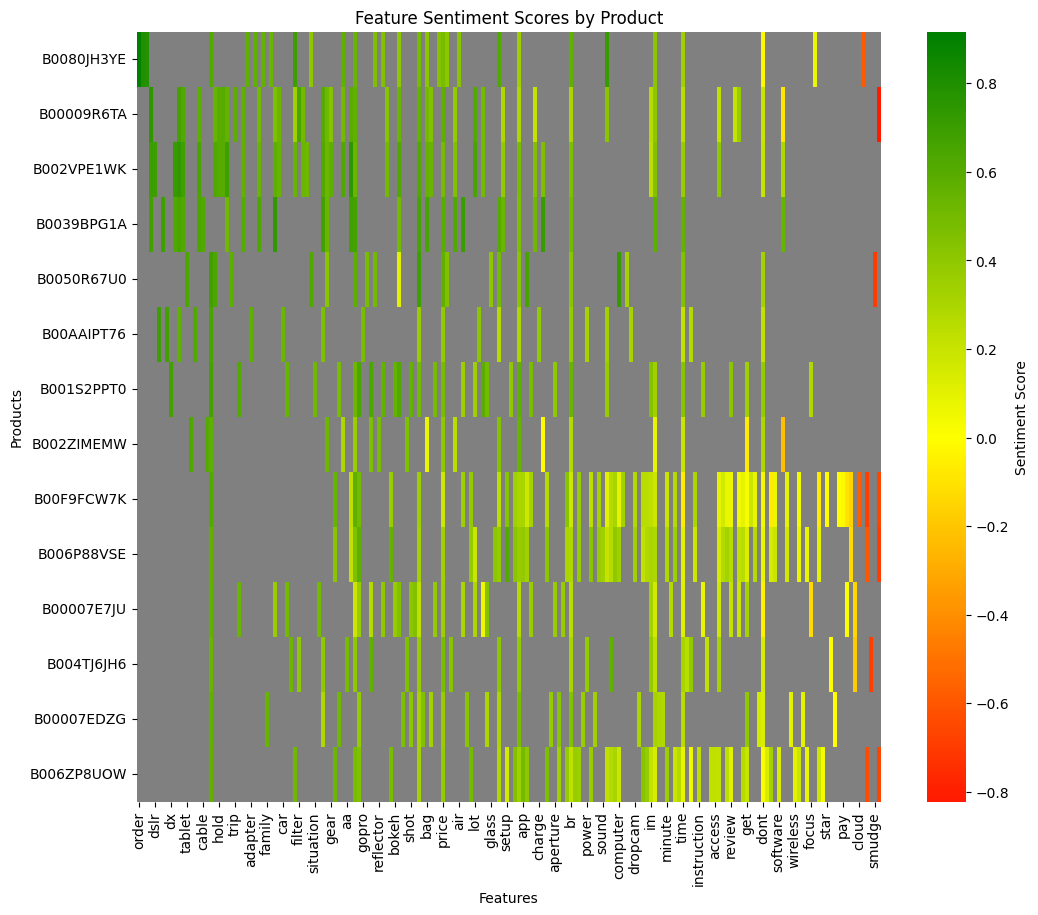

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Assuming feature_scores_df is already loaded
# Pivot the DataFrame
pivot_df = feature_scores_df.pivot(index='product_id', columns='Feature', values='Sentiment Score')

# Handle missing values by setting them to NaN
pivot_df = pivot_df.fillna(pd.NA)

# Sort rows by the maximum sentiment score per product
pivot_df['max_sentiment'] = pivot_df.max(axis=1)
pivot_df = pivot_df.sort_values(by='max_sentiment', ascending=False)
pivot_df = pivot_df.drop(columns='max_sentiment')

# Sort columns by the average sentiment score per feature
average_sentiments = pivot_df.mean().sort_values(ascending=False)
pivot_df = pivot_df[average_sentiments.index]

# Create a custom color map from red to yellow to green, with grey for NaN
cmap = LinearSegmentedColormap.from_list(
    "custom_red_yellow_green",
    [to_rgba('red'), to_rgba('yellow'), to_rgba('green')],
    N=256
)
cmap.set_bad('grey')  # Set color for NaN values

# Plotting
plt.figure(figsize=(12, 10))
ax = sns.heatmap(pivot_df, cmap=cmap, center=0, cbar_kws={'label': 'Sentiment Score'})

# Set title and labels
plt.title('Feature Sentiment Scores by Product')
plt.xlabel('Features')
plt.ylabel('Products')

# Adjust tick labels to show indices instead of names
ax.set_xticklabels(range(len(pivot_df.columns)))
ax.set_yticklabels(range(len(pivot_df.index)))

# Rotate tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [ ]:
import pandas as pd

# Pivot the DataFrame to have each product represented as a row
product_vectors = feature_scores_df.pivot(index='product_id', columns='Feature', values='Popularity Score')

# Fill missing values with 0
product_vectors.fillna(0, inplace=True)

In [ ]:
product_vectors

Feature,aa,access,accessory,adapter,address,air,amazon,aperture,app,baby,...,wasabi,way,week,wifi,wireless,work,year,youre,zipper,zoom
product_id,,,,,,,,,,,,,,,,,,,,,
B00007E7JU,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.160074,0.000000,0.000000,...,0.000000,0.103769,0.000000,0.000000,0.000000,0.123313,0.112611,0.111215,0.000000,0.149837
B00007EDZG,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.563015,0.000000,0.000000,0.000000,0.000000
B00009R6TA,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.130075,0.000000,0.000000,0.000000,0.000000,0.120961,0.000000,0.195526,0.000000
B001S2PPT0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.160633,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142534,0.000000,0.000000,0.000000,0.250000
B002VPE1WK,0.000000,0.000000,0.129378,0.000000,0.000000,0.00000,0.12223,0.000000,0.000000,0.000000,...,0.000000,0.109364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131523,0.000000
B002ZIMEMW,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.253906,0.000000,0.000000,0.152344,0.000000
B0039BPG1A,0.000000,0.000000,0.128911,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105131,0.101377
B004TJ6JH6,0.121658,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.118984,0.000000,0.000000,0.000000,0.320856,0.000000,0.000000,0.000000,0.000000
B0050R67U0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.346786,0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_features contains the DataFrame with popularity scores of features for each product
# Transpose the DataFrame to have products as rows and features as columns

# Calculate cosine similarity between products
cosine_sim_matrix = cosine_similarity(product_vectors)

# Convert cosine similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=product_vectors.index, columns=product_vectors.index)


In [ ]:
cosine_sim_df

product_id,B00007E7JU,B00007EDZG,B00009R6TA,B001S2PPT0,B002VPE1WK,B002ZIMEMW,B0039BPG1A,B004TJ6JH6,B0050R67U0,B006P88VSE,B006ZP8UOW,B0080JH3YE,B00AAIPT76,B00F9FCW7K
product_id,,,,,,,,,,,,,,
B00007E7JU,1.000000,0.381962,0.457297,0.912957,0.449605,0.317379,0.293416,0.360862,0.285278,0.356373,0.354849,0.488474,0.198106,0.380045
B00007EDZG,0.381962,1.000000,0.354400,0.433612,0.367062,0.334246,0.400273,0.487011,0.366152,0.540488,0.599109,0.438584,0.412310,0.526226
B00009R6TA,0.457297,0.354400,1.000000,0.414478,0.962854,0.275256,0.699771,0.327301,0.206313,0.353195,0.353108,0.451219,0.303744,0.346548
B001S2PPT0,0.912957,0.433612,0.414478,1.000000,0.427354,0.293574,0.289662,0.365180,0.287234,0.365316,0.373465,0.508392,0.212762,0.382756
B002VPE1WK,0.449605,0.367062,0.962854,0.427354,1.000000,0.314866,0.753335,0.343483,0.218073,0.344630,0.355396,0.472404,0.319320,0.338006
B002ZIMEMW,0.317379,0.334246,0.275256,0.293574,0.314866,1.000000,0.286104,0.448612,0.372862,0.335328,0.321360,0.375464,0.251112,0.324952
B0039BPG1A,0.293416,0.400273,0.699771,0.289662,0.753335,0.286104,1.000000,0.368492,0.182396,0.331561,0.353128,0.375961,0.440896,0.341354
B004TJ6JH6,0.360862,0.487011,0.327301,0.365180,0.343483,0.448612,0.368492,1.000000,0.322979,0.447229,0.445688,0.356034,0.582395,0.439856
B0050R67U0,0.285278,0.366152,0.206313,0.287234,0.218073,0.372862,0.182396,0.322979,1.000000,0.362416,0.364964,0.446097,0.233515,0.345197


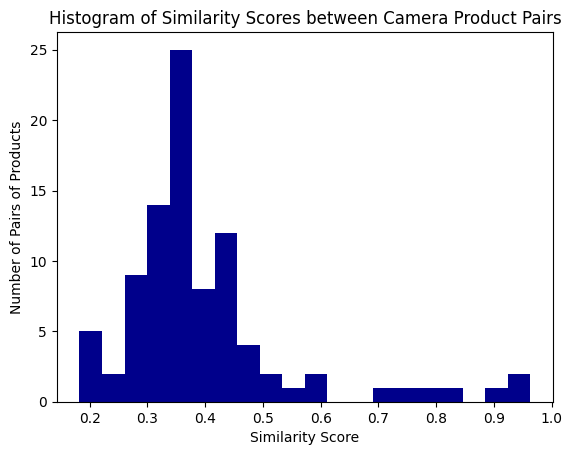

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the upper triangular part of the cosine similarity matrix
similarity_scores = cosine_sim_matrix[np.triu_indices(len(cosine_sim_df), k=1)]

# Plot the histogram of similarity scores
plt.hist(similarity_scores, bins=20, color='darkblue')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Pairs of Products')
plt.title('Histogram of Similarity Scores between Camera Product Pairs')
plt.show()


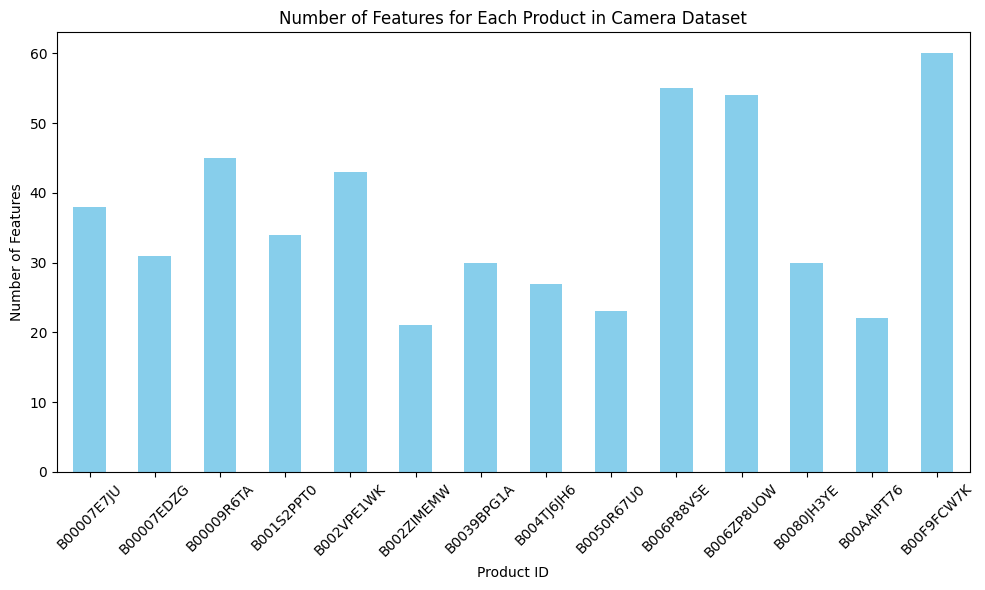

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of features for each product
product_feature_counts = feature_scores_df.groupby('product_id')['Feature'].nunique()

# Set figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot the number of features for each product
product_feature_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Features')
plt.title('Number of Features for Each Product in Camera Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


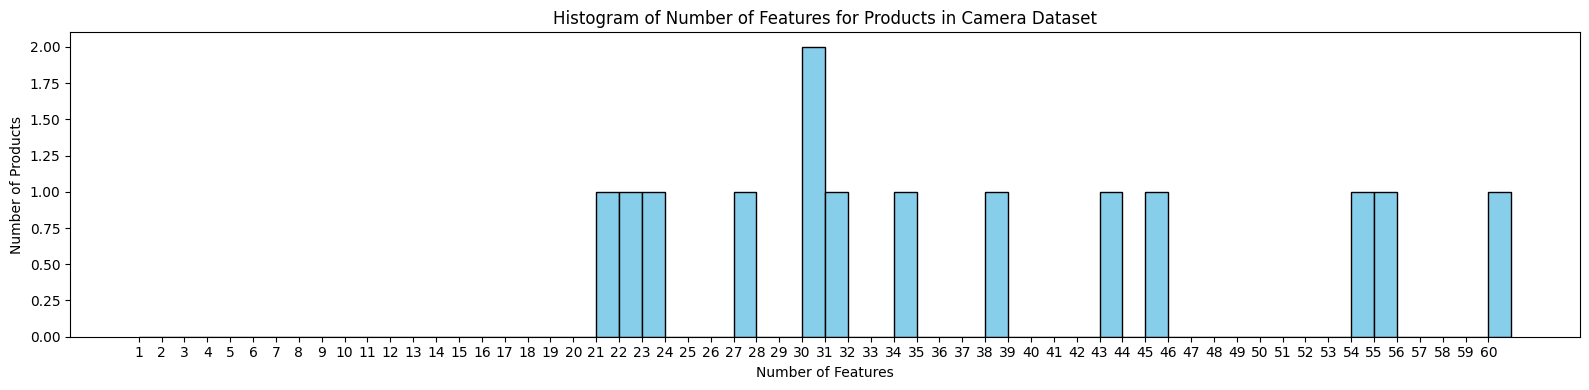

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of features for each product
product_feature_counts = feature_scores_df.groupby('product_id')['Feature'].nunique()

# Count the frequency of each number of features
feature_counts = product_feature_counts.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(16, 4))  # Adjust width and height as needed
plt.hist(product_feature_counts, bins=range(1, product_feature_counts.max() + 2), color='skyblue', edgecolor='black')
plt.xlabel('Number of Features')
plt.ylabel('Number of Products')
plt.title('Histogram of Number of Features for Products in Camera Dataset')
plt.xticks(range(1, product_feature_counts.max() + 1))  # Set x-axis ticks to be integers
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#Better formula

In [ ]:
def better_score(sentiments_q, sentiments_c):
    shared_features = set(sentiments_q.keys()).intersection(set(sentiments_c.keys()))
    better_scores = {}

    # Calculate better score for each shared feature
    for feature in shared_features:
        sent_c = sentiments_c[feature]
        sent_q = sentiments_q[feature]
        better_scores[feature] = (sent_c - sent_q) / 2

    # Calculate overall better score by averaging the scores of shared features
    if shared_features:
        overall_better_score = sum(better_scores.values()) / len(shared_features)
    else:
        overall_better_score = 0  # No shared features to compare

    return better_scores, overall_better_score

# Example usage
query_features, candidate_features = load_and_process_data()

for candidate, features in candidate_features.items():
    better_scores, overall_better_score = better_score(query_features, features)
    print(f"Overall Better Score between Query Product and {candidate}: {overall_better_score:.2f}")
    for feature, score in better_scores.items():
        print(f"Better Score for {feature}: {score:.2f}")

NameError: name 'load_and_process_data' is not defined